## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.info(), X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

(None, (178, 13))

Как видно, всего в таблице 178 строк, а в каждой строке по 178 ненулевых значений, следовательно в таблице нет пропусков

В таблице все признаки вещественные, категориальных признаков не найдено

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
X_test = X_test[['alcohol', 'magnesium']]
X_train = X_train[['alcohol', 'magnesium']]

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
classifiers = []
print('Num of Neigh\tTrain\t\t\t\tTest')
for i in [1, 3, 5, 10, 15, 25]:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    classifiers.append(neigh)
    print(i,'\t\t', accuracy_score(neigh.predict(X_train), y_train), '\t\t',
           accuracy_score(neigh.predict(X_test), y_test))

Num of Neigh	Train				Test
1 		 1.0 		 0.6481481481481481
3 		 0.8387096774193549 		 0.7037037037037037
5 		 0.8306451612903226 		 0.6666666666666666
10 		 0.7741935483870968 		 0.6666666666666666
15 		 0.75 		 0.6296296296296297
25 		 0.7419354838709677 		 0.6481481481481481


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [9]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [10]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [11]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


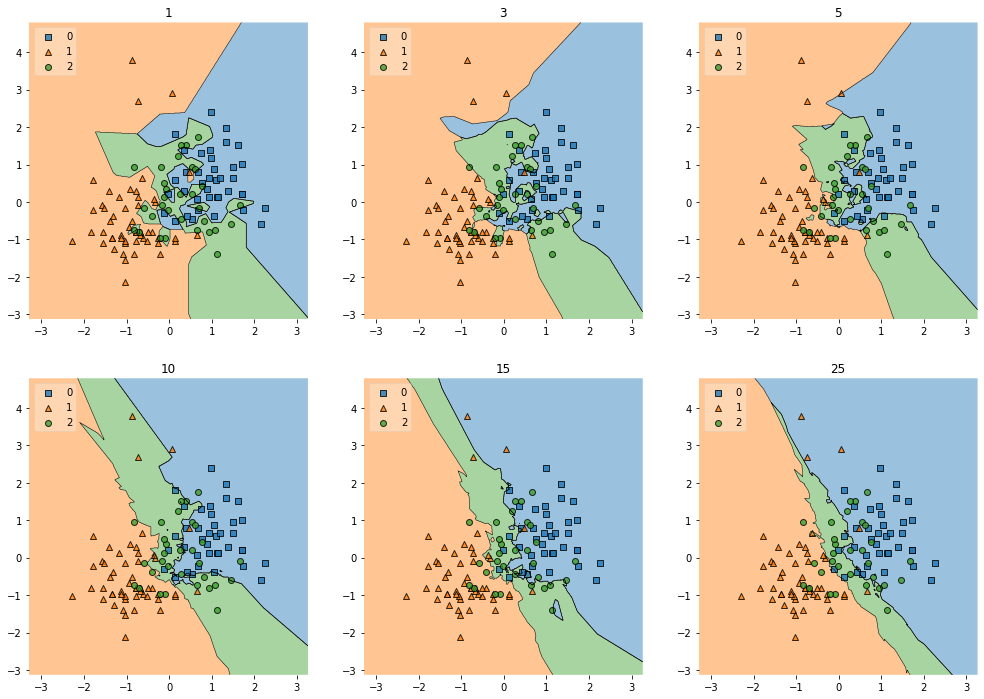

In [12]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(17,12))

labels = ['1', '3', '5', '10', '15', '25']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Оптимальное число соседей - 3. При этом значении модель не подстраивается под выбросы, при этом области хорошо разграничены, основная масса точек находится в своей области

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

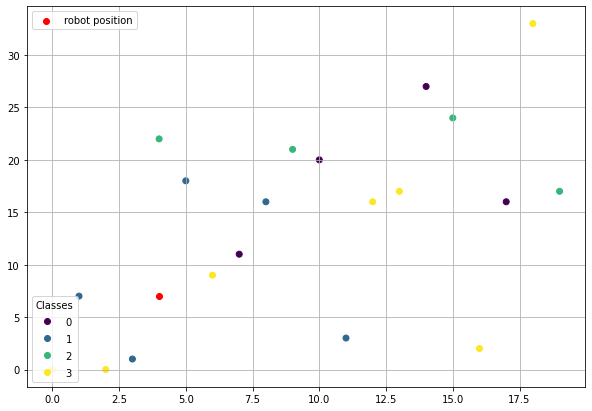

In [13]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])

        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(X = landmarks, y = classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if (np.random.binomial(1, 0.2) == 1):
            turn = self.mapping[0]
        else: 
            turn = self.mapping[self.knn.predict([self.trajectory[len(self.trajectory) - 1]])[0]]
        point = self.trajectory[len(self.trajectory) - 1]
        self.trajectory = np.append(self.trajectory,[point + turn], axis = 0)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [16]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
  
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

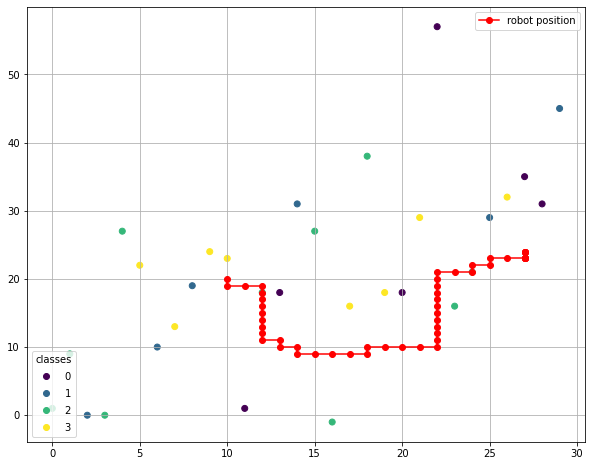

In [17]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

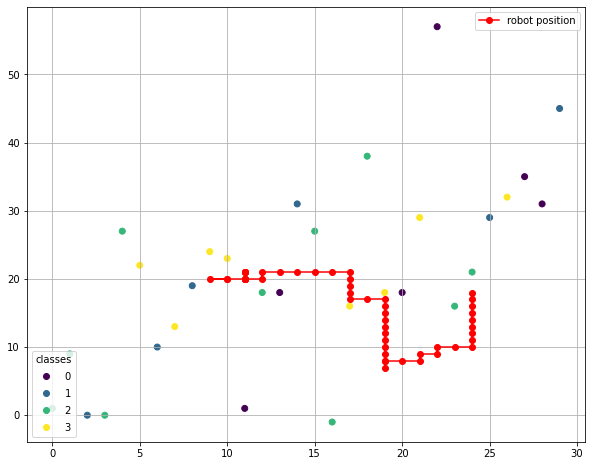

In [18]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

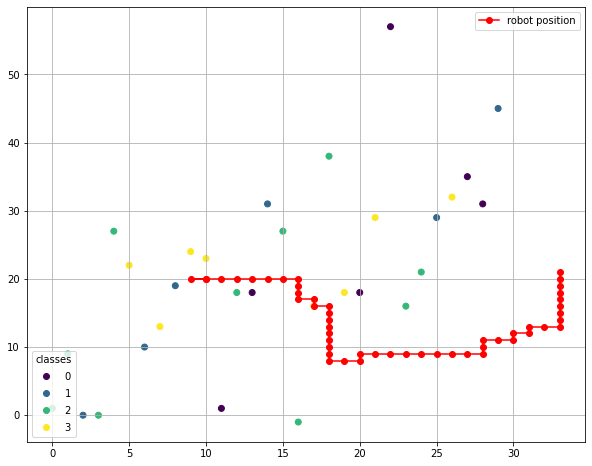

In [19]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

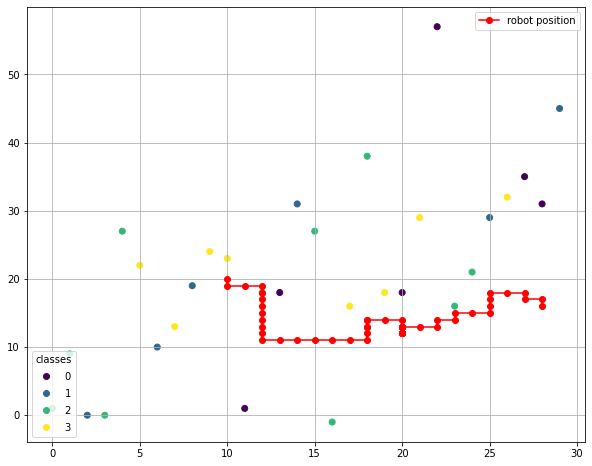

In [20]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

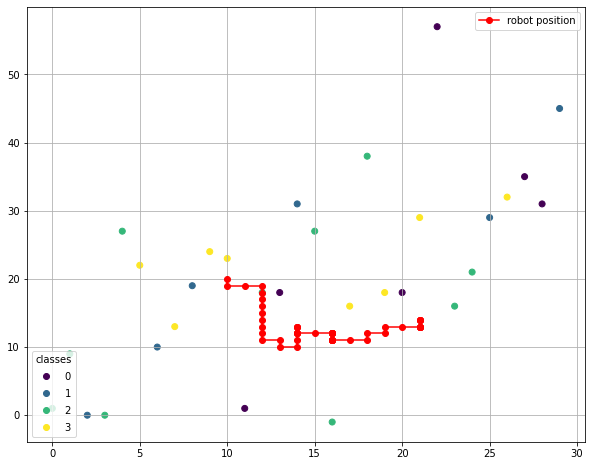

In [21]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

При небольших k учитываются только ближайшие точки, а так как иx немного около траектории, то траектория редко меняет свое напрaвление. При больших k учитываются более дальние точки, поэтому траектория меняет направление немного чаще

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [22]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [23]:
data.isnull().values.any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [24]:
data = data.drop('Unnamed: 0', axis = 1)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [25]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Как видно, с price больше всех коррелирует признак carat, что логично. Также довольно сильно коррелируют с price размеры камня - x, y, z. Во всех случаях линейную зависимость можно интерпретировать следующим образом: чем больше значение признака, тем больше значение целевой переменной.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [26]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [28]:
y = data['price']
data = data.drop('price', axis = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [30]:
scaler = StandardScaler()
X_train[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])


<ipython-input-30-a1330df30677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
/Users/igorgogarev/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-30-a1330df30677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
reg = LinearRegression().fit(X_train, y_train)

In [33]:
'Среднеквадратичная ошибка на тренировочной выборке = ' + str(mean_squared_error(y_train, reg.predict(X_train)))

'Среднеквадратичная ошибка на тренировочной выборке = 1290541.9147450614'

In [34]:
'Среднеквадратичная ошибка на тестовой выборке = ' + str(mean_squared_error(y_test, reg.predict(X_test)))

'Среднеквадратичная ошибка на тестовой выборке = 1244765.4357158698'

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [35]:
for i in range(len(data.columns)):
    print(X_train.columns[i], '\t\t', reg.coef_[i])

carat 		 5338.615670614791
depth 		 -90.1738170334196
table 		 -60.332279910271964
x 		 -1100.418850039307
y 		 -6.458916720528691
z 		 -34.258944620889906
cut_Fair 		 -592.5577321439584
cut_Good 		 2.9633479820950432
cut_Ideal 		 253.63852540503623
cut_Premium 		 185.21223061121012
cut_Very Good 		 150.7436281456215
color_D 		 835.3145532451169
color_E 		 618.2855855078153
color_F 		 562.0105774046027
color_G 		 335.1543150682255
color_H 		 -163.32011592604908
color_I 		 -640.7696800750816
color_J 		 -1546.67523522463
clarity_I1 		 -3889.6097650896622
clarity_IF 		 1569.4275346665522
clarity_SI1 		 -137.9000938309358
clarity_SI2 		 -1107.6692169508406
clarity_VS1 		 768.2245419881318
clarity_VS2 		 447.11581788825424
clarity_VVS1 		 1211.725415981541
clarity_VVS2 		 1138.6857653469592


На порядок превосходят остальные следующие признаки: carat, x, clarity_I1, clarity_SI2, clarity_VVS2, clarity_VVS1 

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [36]:
from sklearn import linear_model

In [37]:
clf = linear_model.Lasso(alpha=10)
clf.fit(X_train, y_train)

Lasso(alpha=10)

In [38]:
for i in range(len(data.columns)):
    print(data.columns[i], '\t', clf.coef_[i])

carat 	 4853.407399085518
depth 	 -100.46514209328413
table 	 -80.37216497862744
x 	 -696.7943266526182
y 	 -0.0
z 	 -32.59993670646105
cut_Fair 	 -443.36703065622953
cut_Good 	 -32.472339597944554
cut_Ideal 	 83.50657024588722
cut_Premium 	 0.0
cut_Very Good 	 0.0
color_D 	 350.36177962478473
color_E 	 176.45265678326172
color_F 	 131.4871661294537
color_G 	 0.0
color_H 	 -433.42870964628503
color_I 	 -846.5779632467381
color_J 	 -1649.8444835259131
clarity_I1 	 -3635.7458999353134
clarity_IF 	 725.3863050590168
clarity_SI1 	 -617.7687744411307
clarity_SI2 	 -1525.2646902425763
clarity_VS1 	 160.05675048102898
clarity_VS2 	 -24.573215202046516
clarity_VVS1 	 538.3343048357456
clarity_VVS2 	 512.2200091267648


In [39]:
clf = linear_model.Ridge(alpha=10)
clf.fit(X_train, y_train)

Ridge(alpha=10)

In [40]:
for i in range(len(data.columns)):
    print(data.columns[i], '\t', clf.coef_[i])

carat 	 5298.926724171532
depth 	 -88.82284574166412
table 	 -60.804550158040094
x 	 -1058.7451214926662
y 	 -9.05173053188746
z 	 -37.405247895839096
cut_Fair 	 -594.9432247479448
cut_Good 	 3.0086488640396083
cut_Ideal 	 254.50200367793812
cut_Premium 	 185.2506132958353
cut_Very Good 	 152.18195890988486
color_D 	 830.3984688132596
color_E 	 614.5758811357179
color_F 	 558.3875484675193
color_G 	 333.49690861870835
color_H 	 -163.3645138506382
color_I 	 -637.5182485746192
color_J 	 -1535.9760446091907
clarity_I1 	 -3815.4937479528835
clarity_IF 	 1549.2430323731824
clarity_SI1 	 -146.0881536233681
clarity_SI2 	 -1111.4476318335794
clarity_VS1 	 757.9570504438202
clarity_VS2 	 438.4201519711227
clarity_VVS1 	 1199.6435608729323
clarity_VVS2 	 1127.765737748671


Веса уменьшились не очень сильно, однако некоторые веса занулились, это говорит о том, что была серьезная проблема мультикуллинеарности

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [41]:
alpha = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []
for i in alpha:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(X_train, y_train)
    norms_lasso.append(np.linalg.norm(clf.coef_))
    
    clf_2 = linear_model.Ridge(alpha=i)
    clf_2.fit(X_train, y_train)
    norms_ridge.append(np.linalg.norm(clf_2.coef_))

/Users/igorgogarev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75483763.69013977, tolerance: 60605526.52466703
  model = cd_fast.enet_coordinate_descent(


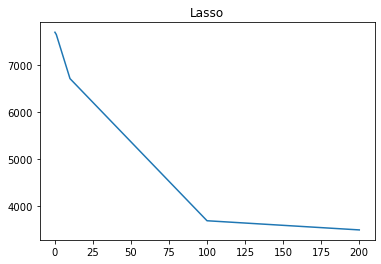

In [42]:
plt.plot(alpha, norms_lasso)
plt.title('Lasso')
plt.show()

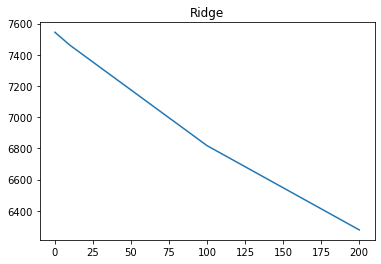

In [43]:
plt.plot(alpha, norms_ridge)
plt.title('Ridge')
plt.show()

Как видно из графиков, агрессивнее уменьшает веса lasso (квадртачиная зависимость против линейной). Так как lasso стемится занижать большие веса вплоть до их зануления, ее используют для отбора признаков

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [44]:
from sklearn.linear_model import LassoCV

In [45]:
reg = LassoCV(alphas = alpha, cv=5, random_state=42).fit(X_train, y_train)
for i in range(len(reg.alphas_)):
    print(reg.alphas_[i], '\t', reg.mse_path_[i].mean())

/Users/igorgogarev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511839172.9327774, tolerance: 48476565.46527788
  model = cd_fast.enet_coordinate_descent_gram(


200.0 	 2454496.0892084376
100.0 	 2253981.9244711036
10.0 	 1330613.9832456633
1.0 	 1293926.6751860096
0.1 	 1295630.4031505361


Наилучшее качество модель дает при параметрах 1 и 0.1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [46]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
for i in range(len(data.columns)):
    print(data.columns[i], '\t', clf.coef_[i])

carat 	 5333.777445665985
depth 	 -90.27141799427353
table 	 -60.52271577078285
x 	 -1096.537667429855
y 	 -6.161795511786216
z 	 -34.297158585202915
cut_Fair 	 -740.4360040039544
cut_Good 	 -146.7782331799045
cut_Ideal 	 102.57724764498842
cut_Premium 	 33.859449119425925
cut_Very Good 	 -0.0
color_D 	 758.0579851892468
color_E 	 541.4061797276548
color_F 	 485.1949637646992
color_G 	 258.757038725952
color_H 	 -238.61919960030815
color_I 	 -715.4599480560325
color_J 	 -1620.3569799392837
clarity_I1 	 -4430.348353689394
clarity_IF 	 1017.8113354974023
clarity_SI1 	 -686.0184986281326
clarity_SI2 	 -1655.1631217070903
clarity_VS1 	 218.9012853630612
clarity_VS2 	 -100.89211057791012
clarity_VVS1 	 661.7512451936419
clarity_VVS2 	 589.1675504986891


/Users/igorgogarev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75483763.69013977, tolerance: 60605526.52466703
  model = cd_fast.enet_coordinate_descent(


    Самый информативный признак - carat - это логично, обычно цена камня формируется на основе количества карат
    Большое по модулю значение x можно объяснить не до конца решенной проблемой мультиколлинеарности (чтобы ее 
    решить, можно было бы попробовать скомбинировать признаки x, y, z и ввести единый признак - объем)
    Так же есть большие веса у некоторых признаках, отвечающих за прозрачность - скорее всего, чем прозрачне алмаз, тем он дороже - а высокая прозрачность соответствует некоторой из категорий (например, clarity_IF)
    Наименее информативными оказались веса признаков cut - видимо, огранка не сильно влияет на цену, однако
    можно заметить логичную зависимоть - признаки Fair и Good уменьшают стоимость, а Ideal и Premium - увеличивают.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [47]:
res = clf.predict(X_test)

In [48]:
mean_squared_error(res, y_test)

1244678.464218885

    Ошибка стала чуть меньше, скорее всего потому, что уменьшилось влияние проблемы мультиколлинеарности из-за
    зануления некоторых весов. Так же все веса немного уменьшились за счет регуляризации, а значит модель 
    более сбалансированно вела себя на новых данных. Поэтому можно сказать, что лучше использовать модель 
    обучения Lasso.